# Polynomial regressions on SST trend data 
https://towardsdatascience.com/polynomial-regression-which-python-package-to-use-78a09b0ac87b
It might be worth creating functions for each of the lines of fit and plotting serveral!

In [1]:
# Using HADSST4_timeseries.csv 
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [2]:
# Opening file and define variables
df = pd.read_csv('/Users/bendixon/Documents/GitHub/climate/HadSST4_timeseries.csv')
year = df['year']; anomaly = df['anomaly']

[Text(0, 0.5, 'SST in deg C'), Text(0.5, 1.0, 'SST Anomaly over time')]

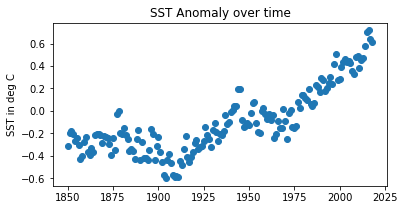

In [8]:
# Simple chart
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.scatter(year,anomaly); ax.set(Title='SST Anomaly over time',ylabel='SST in deg C')

[ 6.00692484e-05 -2.27506099e-01  2.15078346e+02]


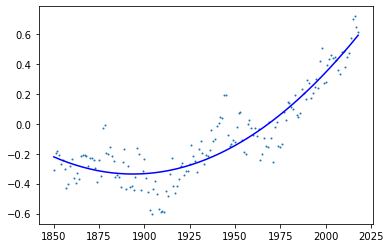

In [40]:
# Plotting this using a polynomial function
from numpy import polyfit
x = year 
y = anomaly

# Using degree 1 gives the same value as linear regression, 
u = polyfit(x, y, deg=2)
y_pred = u[0] * x**2 + u[1] * x + u[2]
print(u)

plt.plot(x,y_pred,color='blue',label='fitted line')
plt.scatter(x,y,s=1,label='HadSST')

In [ ]:
# Trying this with a polynomial of degree 3 - gives low coeff for x^3 term
u = polyfit(x, y, deg=3)
print(u)
y_pred2 = u[0] * x**3 + u[1] * x**2 + u[2] * x + u[3]

plt.plot(x,y_pred2,color='blue',label='Poly reg, deg 3')
plt.scatter(x,y,s=1,label='HadSST')
plt.legend()
plt.title('Global SST anomaly using polynomial of third degree')

[ 4.32493561e-08 -1.90863516e-04  2.57612596e-01 -9.74226294e+01]


Text(0.5, 1.0, 'Global SST anomaly using polynomial of third degree')

169 169
slope:  0.004841754164387647
intercept:  -9.459063204813283
r value:  0.802516270257719
p value:  2.6720630467440723e-39


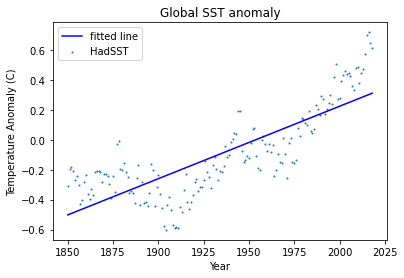

In [5]:
# Plotting this using the linregress function
x = year
y = anomaly # needs to be a list otherwise it doesn't work
print(len(x), len(y))
slope, intercept, r_value, p_value, std_err = linregress(x,y) # linregress function
print('slope: ',slope)
print('intercept: ',intercept)
print('r value: ',r_value)
print('p value: ',p_value)

# plot results
plt.plot(x,slope*x + intercept,color='blue',label='fitted line')
plt.scatter(x,y,s=1,label='HadSST')
plt.legend()
plt.title('Global SST anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (C)')
plt.show()

In [4]:
# linear regression
scipy.stats.linregress(year, anomaly)

LinregressResult(slope=0.004841754164387647, intercept=-9.459063204813283, rvalue=0.802516270257719, pvalue=2.6720630467440723e-39, stderr=0.00027854534839969993)

Text(0.5, 1.0, 'Global SST temperature anomaly')

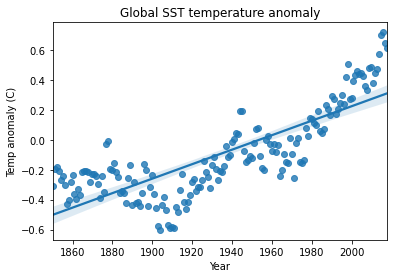

In [6]:
# Using seaborn's inbuilt regression plot
import seaborn as sns
ax2 = sns.regplot(year, anomaly)
ax2.set_xlabel('Year')
ax2.set_ylabel('Temp anomaly (C)')
ax2.set_title('Global SST temperature anomaly')